In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import matplotlib.lines as mlines
%matplotlib inline

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result

#### Enzyme concentrations

In [2]:
cases = ['Bjorkeroth2020_batchYNB', 'Yu2021_chemoNlimNH4_030']

df_elevel = pd.read_excel('../../parameterization/kapp/results/enzLevel_in_g_per_gDW.xlsx')
df_elevel = df_elevel.loc[:, ['id', 'subsystem_group', 'subsystem'] + cases]
df_elevel.index = df_elevel.id.to_list()

df_enz = pd.read_excel('../../build_model/input/ENZYME_stoich_curation_2021-10-01.xlsx')
df_enz.index = df_enz.id.to_list()

df_except = pd.read_excel('./enz_higher_kapp_nlim_0_3.xlsx')
df_except.index = df_except.Rxn.to_list()
enz_except = []
for rxn in df_except.index:
    rxn_src = rxn[:-4]
    df = df_enz[df_enz.rxn_src == rxn_src]
    enz_except += df.enz.to_list()
enz_except = sorted(list(set(enz_except)))

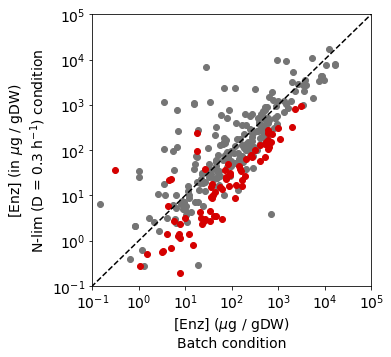

In [3]:
enz_other = [i for i in df_elevel.index if i not in enz_except]
df = df_elevel.loc[enz_other, :]
df = df[(df[cases[0]].isnull() == False) & (df[cases[1]].isnull() == False)]
x = np.log10(df['Bjorkeroth2020_batchYNB'].to_list()) + 6
y = np.log10(df['Yu2021_chemoNlimNH4_030'].to_list()) + 6

df = df_elevel.loc[enz_except, :]
df = df[(df[cases[0]].isnull() == False) & (df[cases[1]].isnull() == False)]
x2 = np.log10(df['Bjorkeroth2020_batchYNB'].to_list()) + 6
y2 = np.log10(df['Yu2021_chemoNlimNH4_030'].to_list()) + 6

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, c='#757575')
ax.scatter(x2, y2, c='#d50000')

ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ticks = [i-1 for i in range(0,7)]
ticklabels = ['$10^{' + str(i) + '}$' for i in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=14)
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=14)

ax.set_xlabel('[Enz] ($\mu$g / gDW)\nBatch condition', fontsize=14)
ax.set_ylabel('[Enz] (in $\mu$g / gDW)\nN-lim (D = 0.3 h$^{-1}$) condition', fontsize=14)

line = mlines.Line2D([-2, 6], [-2, 6], color='k',
                     linestyle='--', alpha=1, zorder=1)
ax.add_line(line);
plt.savefig('../../../scRBA_figures/components/enz_level_Nlim_Fig4followup.png', transparent=True, bbox_inches='tight')

In [4]:
enz_other = [i for i in df_elevel.index if i not in enz_except]
df = df_elevel.loc[enz_other, :]
df = df[(df[cases[0]].isnull() == False) & (df[cases[1]].isnull() == False)]
x = df['Bjorkeroth2020_batchYNB'].to_list()
y = df['Yu2021_chemoNlimNH4_030'].to_list()
xyratio = [x[i] / y[i] for i in range(0,len(x))]

df = df_elevel.loc[enz_except, :]
df = df[(df[cases[0]].isnull() == False) & (df[cases[1]].isnull() == False)]
x2 = df['Bjorkeroth2020_batchYNB'].to_list()
y2 = df['Yu2021_chemoNlimNH4_030'].to_list()
xyratio2 = [x2[i] / y2[i] for i in range(0,len(x2))]

In [5]:
np.average(xyratio)

2.5597085219900855

In [6]:
np.average(xyratio2)

5.512303435231756

#### Flux

In [7]:
cases = ['Bjorkeroth2020_batchYNB', 'Yu2021_chemoNlimNH4_030']

df_except = pd.read_excel('./enz_higher_kapp_nlim_0_3.xlsx')
df_except.index = df_except.Rxn.to_list()
rxn_except = sorted([rxn[:-4] for rxn in df_except.index])

res_x = RBA_result(biom_id=None)
res_x.load_from_json('../../parameterization/kapp/datasets/Bjorkeroth2020_batchYNB/RBA_result.json')

res_y = RBA_result(biom_id=None)
res_y.load_from_json('../../parameterization/kapp/datasets/Yu2021_chemoNlimNH4_030/RBA_result.json')

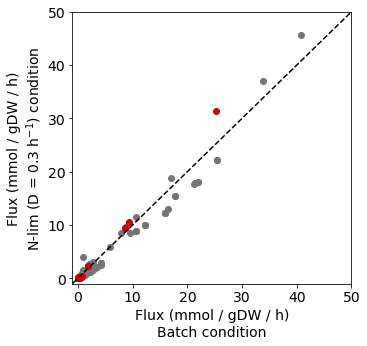

In [8]:
rxn_common = set(res_x.metabolic_flux.keys()) & set(res_y.metabolic_flux.keys())
rxn_other = sorted([rxn for rxn in rxn_common if rxn not in rxn_except])
rxn_except = [rxn for rxn in rxn_except if rxn in rxn_common]

x = [abs(res_x.metabolic_flux[rxn]) for rxn in rxn_other]
y = [abs(res_y.metabolic_flux[rxn] )for rxn in rxn_other]

x2 = [abs(res_x.metabolic_flux[rxn] )for rxn in rxn_except]
y2 = [abs(res_y.metabolic_flux[rxn]) for rxn in rxn_except]

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, c='#757575')
ax.scatter(x2, y2, c='#d50000')

ax.set_xlim(-1,50)
ax.set_ylim(-1,50)
ticks = [0, 10, 20, 30, 40, 50]
ticklabels = ticks
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels, fontsize=14)
ax.set_yticks(ticks)
ax.set_yticklabels(ticklabels, fontsize=14)

ax.set_xlabel('Flux (mmol / gDW / h)\nBatch condition', fontsize=14)
ax.set_ylabel('Flux (mmol / gDW / h)\nN-lim (D = 0.3 h$^{-1}$) condition', fontsize=14)

line = mlines.Line2D([-2, 51], [-2, 51], color='k',
                     linestyle='--', alpha=1, zorder=1)
ax.add_line(line);
plt.savefig('../../../scRBA_figures/components/flux_Nlim_Fig4followup.png', transparent=True, bbox_inches='tight')

In [9]:
rxn_common = set(res_x.metabolic_flux.keys()) & set(res_y.metabolic_flux.keys())
rxn_other = sorted([rxn for rxn in rxn_common if rxn not in rxn_except])
rxn_except = [rxn for rxn in rxn_except if rxn in rxn_common]

x = [abs(res_x.metabolic_flux[rxn]) for rxn in rxn_other]
y = [abs(res_y.metabolic_flux[rxn] )for rxn in rxn_other]
xyratio = [x[i] / y[i] for i in range(0,len(x))]

x2 = [abs(res_x.metabolic_flux[rxn] )for rxn in rxn_except]
y2 = [abs(res_y.metabolic_flux[rxn]) for rxn in rxn_except]
xyratio2 = [x2[i] / y2[i] for i in range(0,len(x2))]

In [10]:
np.average(xyratio)

64.22824559900668

In [11]:
np.average(xyratio2)

1.4142501979626636